In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data= pd.read_csv("/kaggle/input/framingham-heart-study-dataset/framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
data.rename(columns={'male':'sex_name'},inplace=True)

In [4]:
data.head()

,sex_name,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.drop(['education'],inplace=True,axis=1)

In [6]:
data.head()

,sex_name,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: >

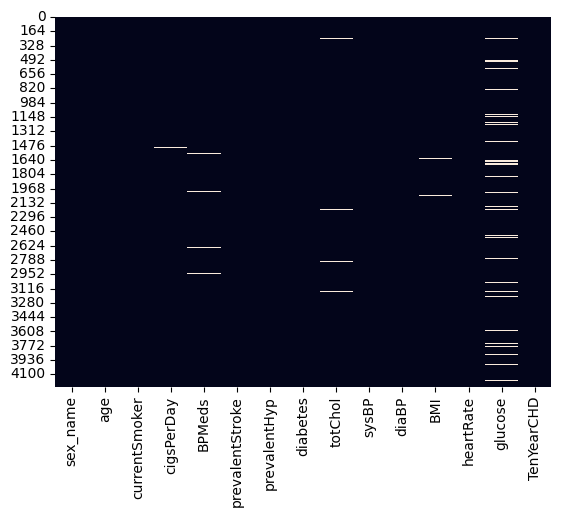

In [7]:
sns.heatmap(data.isnull(),cbar=False,)

<Axes: >

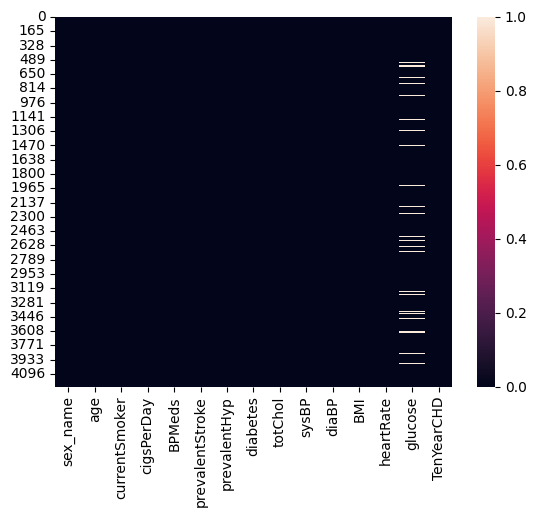

In [8]:
data = data.loc[data.drop(columns=['glucose']).notna().all(axis=1)]
sns.heatmap(data.isnull())

<Axes: xlabel='glucose', ylabel='age'>

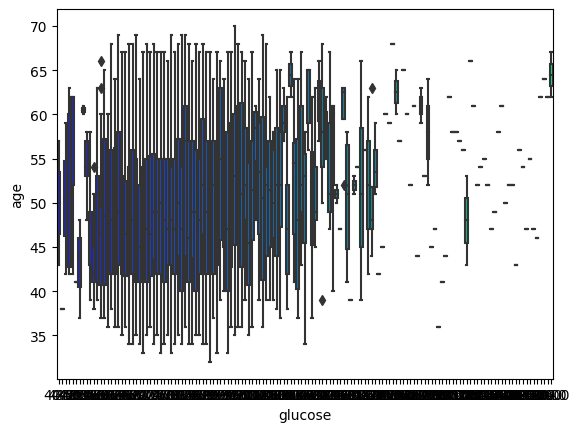

In [9]:
sns.boxplot(x='glucose',y='age',data=data,palette='winter')

<Axes: >

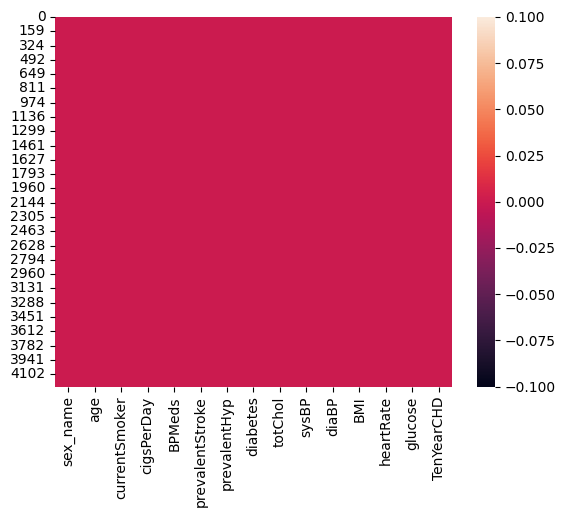

In [10]:
data.dropna(subset=['glucose'],inplace=True)
sns.heatmap(data.isnull())

In [11]:
print(data.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [12]:
x=np.asarray(data[['sex_name','age','currentSmoker','cigsPerDay',
               'BPMeds','prevalentStroke','prevalentHyp',
               'diabetes','totChol','sysBP','diaBP','BMI',
               'heartRate','glucose']])
y=np.asarray(data['TenYearCHD'])
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [13]:
print("x split",x_train.shape,x_test.shape)
print('y split',y_train.shape,y_test.shape)

x split (2625, 14) (1126, 14)
y split (2625,) (1126,)


In [14]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred= logreg.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print('score = ',score)

score =  0.8525754884547069
